In [1]:
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
date = 20230214
spec_filter = 'empty-holo4_003'
flat_filter = 'SDSSg_65mm'
spec_seq = 752
flat_seq = 335

In [3]:
spec_path = 'my_pseudo_postisrccd_img/{0}'.format(date)
spec_name = 'exposure_{0}00{1}_{2}_pseudo-postisrccd.fits'.format(date,spec_seq,spec_filter)

flat_path = 'special_flats_{0}00{1}/'.format(date,flat_seq)
flat_name = 'flat_{0}00{1}_{2}.fits'.format(date,flat_seq,flat_filter)
special_flat_name = 'special_flat_{0}00{1}_{2}.fits'.format(date,flat_seq,flat_filter)
special_flat_grad_name = 'special_flat_{0}00{1}_{2}_gradient_removed.fits'.format(date,flat_seq,flat_filter)

In [4]:
spec_file = fits.open(os.path.join(spec_path,spec_name))

In [5]:
spec_file[1].shape

(4000, 4072)

In [6]:
spec_data = spec_file[1].data

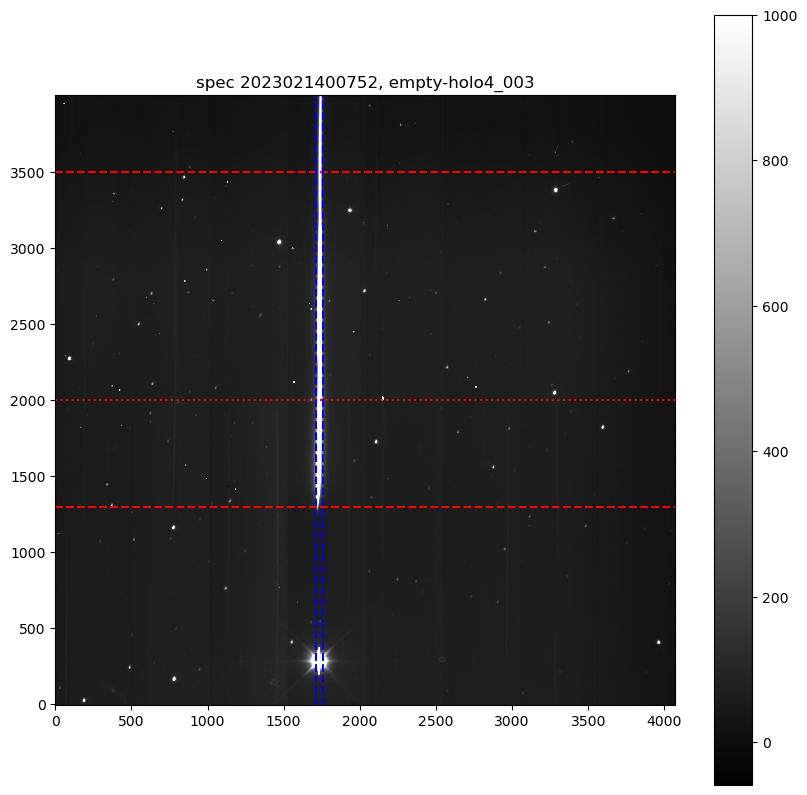

In [7]:
x0 = 1710
x1 = 1760
y0 = 1300
y1 = 3500

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
im = ax.imshow(spec_data,cmap="gray",vmax=1000,origin='lower')#,norm=LogNorm())
ax.axhline(y=y0,ls='--',color='r')
ax.axhline(y=y1,ls='--',color='r')
ax.axhline(y=2000,ls=':',color='r')
ax.axvline(x=x0,ls='--',color='b')
ax.axvline(x=x1,ls='--',color='b')
ax.set_title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
fig.colorbar(im,ax=ax)
plt.savefig('example_spec_2d_{0}_{1}_{2}.png'.format(date,spec_seq,spec_filter))

In [8]:
spec_ = spec_data[y0:y1,x0:x1]
spec_.shape

(2200, 50)

In [9]:
spec = np.sum(spec_,axis=1)
spec.shape

(2200,)

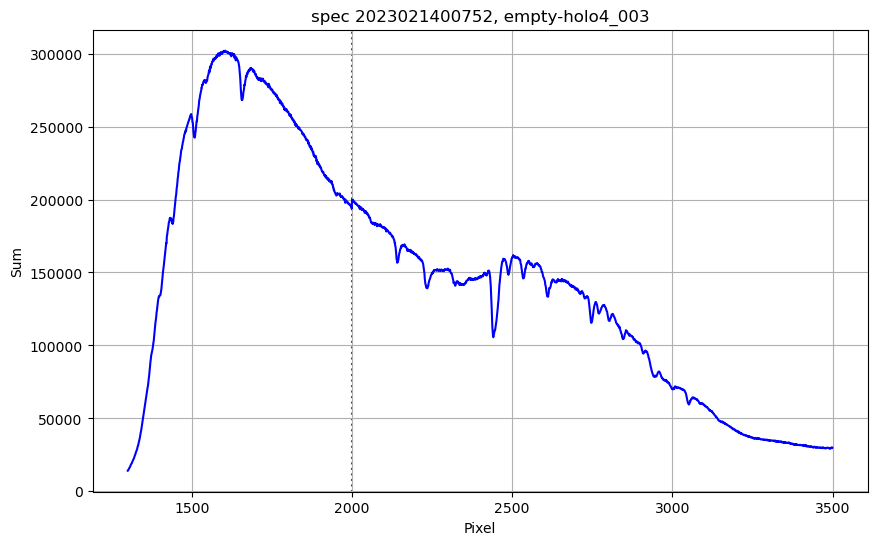

In [10]:
pix = np.arange(y0,y1)
plt.figure(figsize=(10,6))
plt.plot(pix,spec,ls='-',color='b')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Sum')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.savefig('example_spec_{0}_{1}_{2}.png'.format(date,spec_seq,spec_filter))

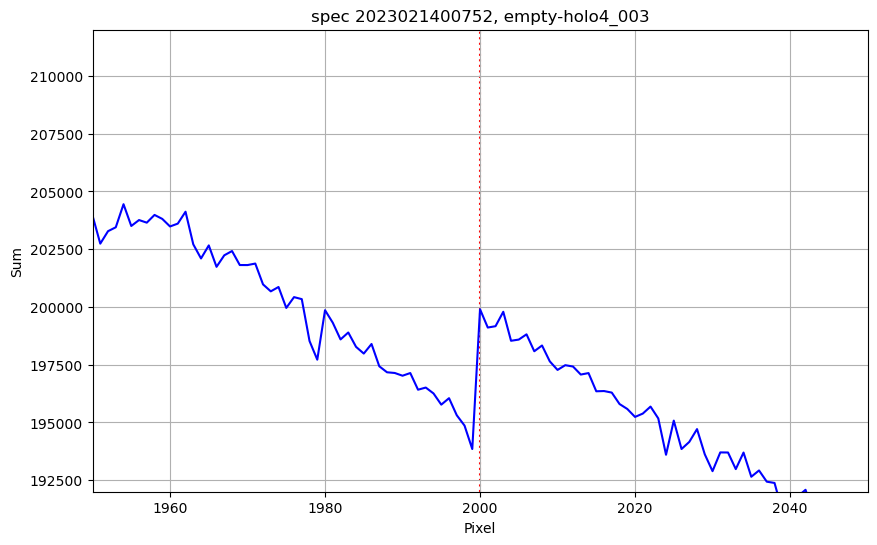

In [11]:
pix = np.arange(y0,y1)
plt.figure(figsize=(10,6))
plt.plot(pix,spec,ls='-',color='b')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlim(1950,2050)
plt.ylim(192000,212000)
plt.xlabel('Pixel')
plt.ylabel('Sum')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.savefig('example_spec_zoom_{0}_{1}_{2}.png'.format(date,spec_seq,spec_filter))

In [12]:
flat_file = fits.open(os.path.join(flat_path,flat_name))
sflat_file = fits.open(os.path.join(flat_path,special_flat_name))
sflat_grad_file = fits.open(os.path.join(flat_path,special_flat_grad_name))

In [13]:
flat_data = flat_file[1].data
sflat_data = sflat_file[1].data
sflat_grad_data = sflat_grad_file[1].data

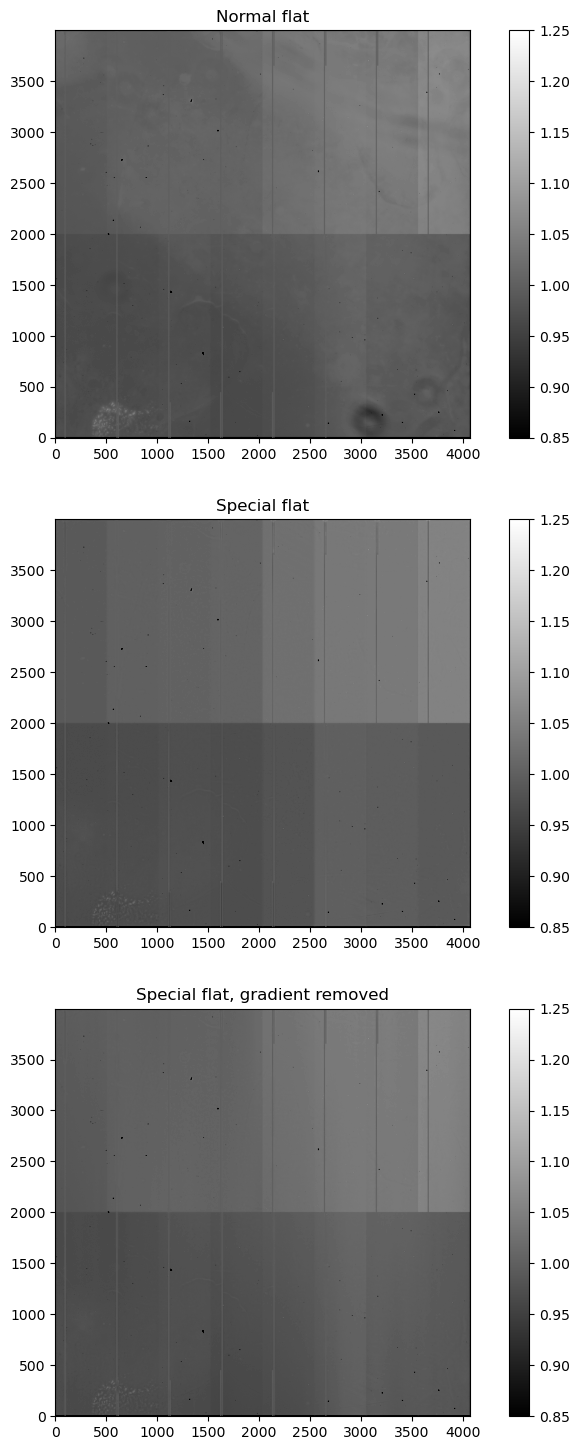

In [14]:
fig = plt.figure(figsize=(10,18))
ax=fig.add_subplot(311)
im = ax.imshow(flat_data,cmap="gray",vmin=0.85,vmax=1.25,origin='lower')#,norm=LogNorm())
ax.set_title('Normal flat')
fig.colorbar(im,ax=ax)
ax=fig.add_subplot(312)
im = ax.imshow(sflat_data,cmap="gray",vmin=0.85,vmax=1.25,origin='lower')#,norm=LogNorm())
ax.set_title('Special flat')
fig.colorbar(im,ax=ax)
ax=fig.add_subplot(313)
im = ax.imshow(sflat_grad_data,cmap="gray",vmin=0.85,vmax=1.25,origin='lower')#,norm=LogNorm())
ax.set_title('Special flat, gradient removed')
fig.colorbar(im,ax=ax)

We apply the different flats to the data 

In [15]:
spec_data_flat = spec_data/flat_data
spec_data_sflat = spec_data/sflat_data
spec_data_sflat_grad = spec_data/sflat_grad_data

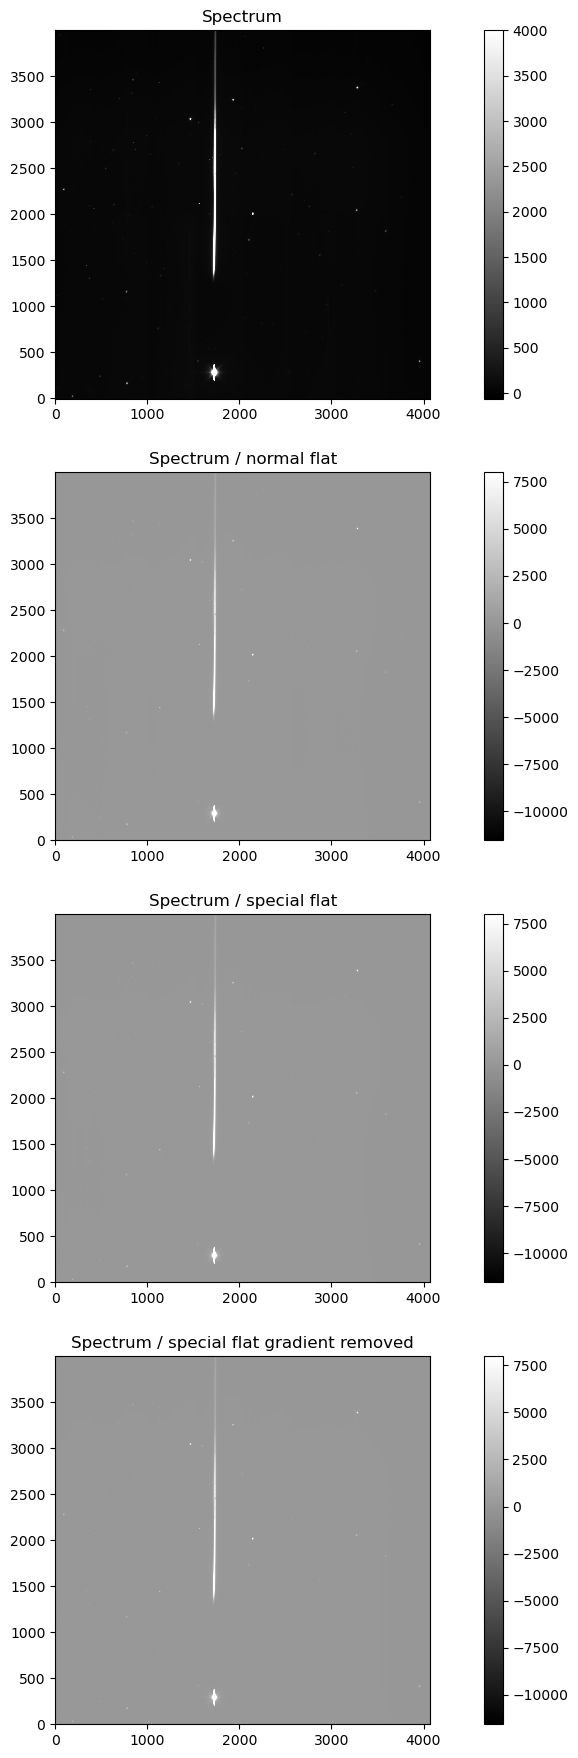

In [16]:
fig = plt.figure(figsize=(14,22))
ax=fig.add_subplot(411)
im = ax.imshow(spec_data,cmap="gray",vmax=4000,origin='lower')#,norm=LogNorm())
ax.set_title('Spectrum')
fig.colorbar(im,ax=ax)
ax=fig.add_subplot(412)
im = ax.imshow(spec_data_flat,cmap="gray",vmax=8000,origin='lower')#,norm=LogNorm())
ax.set_title('Spectrum / normal flat')
fig.colorbar(im,ax=ax)
ax=fig.add_subplot(413)
im = ax.imshow(spec_data_sflat,cmap="gray",vmax=8000,origin='lower')#,norm=LogNorm())
ax.set_title('Spectrum / special flat')
fig.colorbar(im,ax=ax)
ax=fig.add_subplot(414)
im = ax.imshow(spec_data_sflat_grad,cmap="gray",vmax=8000,origin='lower')#,norm=LogNorm())
ax.set_title('Spectrum / special flat gradient removed')
fig.colorbar(im,ax=ax)

In [17]:
spec_f_ = spec_data_flat[y0:y1,x0:x1]
spec_sf_ = spec_data_sflat[y0:y1,x0:x1]
spec_sf_gr_ = spec_data_sflat_grad[y0:y1,x0:x1]

In [18]:
spec_f = np.sum(spec_f_,axis=1)
spec_sf = np.sum(spec_sf_,axis=1)
spec_sf_gr = np.sum(spec_sf_gr_,axis=1)

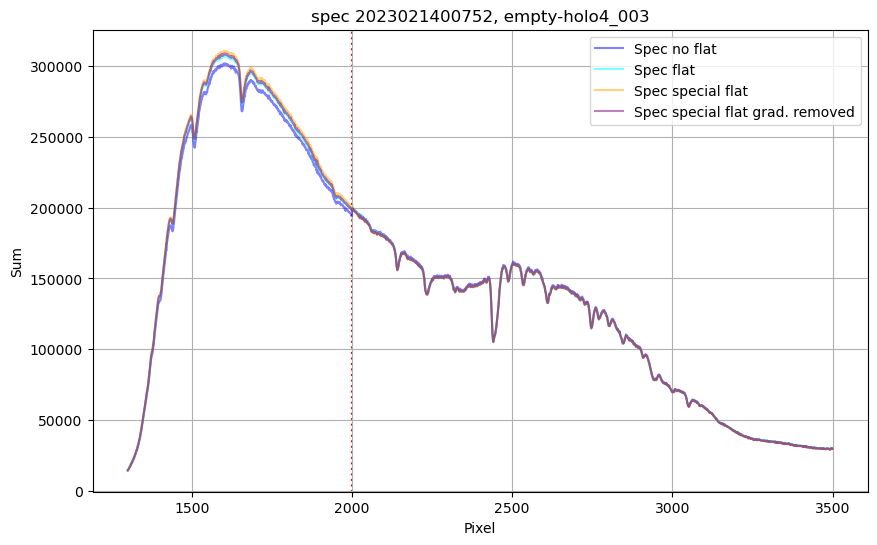

In [19]:
pix = np.arange(y0,y1)
plt.figure(figsize=(10,6))
plt.plot(pix,spec,ls='-',color='b',alpha=0.5,label='Spec no flat')
plt.plot(pix,spec_f,ls='-',color='cyan',alpha=0.5,label='Spec flat')
plt.plot(pix,spec_sf,ls='-',color='orange',alpha=0.5,label='Spec special flat')
plt.plot(pix,spec_sf_gr,ls='-',color='purple',alpha=0.5,label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Sum')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")
plt.savefig('example_spec_deflatened_{0}_{1}_{2}.png'.format(date,spec_seq,spec_filter))

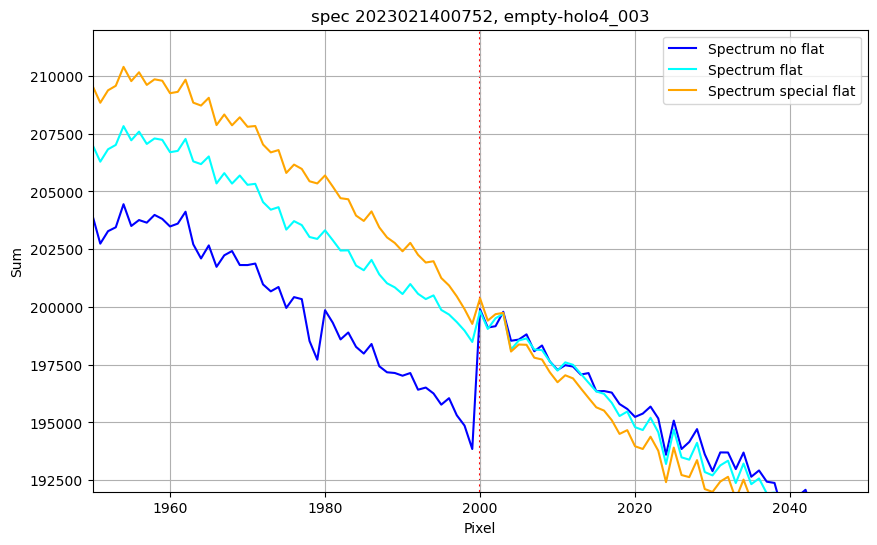

In [20]:
pix = np.arange(y0,y1)
plt.figure(figsize=(10,6))
plt.plot(pix,spec,ls='-',color='b',label='Spectrum no flat')
plt.plot(pix,spec_f,ls='-',color='cyan',label='Spectrum flat')
plt.plot(pix,spec_sf,ls='-',color='orange',label='Spectrum special flat')
#plt.plot(pix,spec_sf_gr,ls='-',color='purple',label='Spectrum special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.xlim(1950,2050)
plt.ylim(192000,212000)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Sum')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")
plt.savefig('example_spec_deflatened_zoom_{0}_{1}_{2}.png'.format(date,spec_seq,spec_filter))

In [21]:
#spec_file[0].header

## Save deflattened images in fits files 

In [22]:
hdu_list = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu1.header = spec_file[0].header
hdu1.data = spec_file[0].data
hdu_list.append(hdu1)
hdu2 = fits.ImageHDU()
hdu2.header = spec_file[1].header
hdu2.data = spec_data/flat_data
hdu_list.append(hdu2)
spec_name_out = 'deflat_'+spec_name
hdu_list.writeto(spec_name_out,overwrite=True)

In [23]:

hdu_list = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu1.header = spec_file[0].header
hdu1.data = spec_file[0].data
hdu_list.append(hdu1)
hdu2 = fits.ImageHDU()
hdu2.header = spec_file[1].header
hdu2.data = spec_data/sflat_data
hdu_list.append(hdu2)
spec_name_out = 'special_deflat_'+spec_name
hdu_list.writeto(spec_name_out,overwrite=True)

In [24]:
hdu_list = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu1.header = spec_file[0].header
hdu1.data = spec_file[0].data
hdu_list.append(hdu1)
hdu2 = fits.ImageHDU()
hdu2.header = spec_file[1].header
hdu2.data = spec_data/sflat_grad_data
hdu_list.append(hdu2)
spec_name_out = 'special_deflat_no_grad_'+spec_name
hdu_list.writeto(spec_name_out,overwrite=True)

# Let's look at the spectrum without adding the signal of the neighboring columns 

In [25]:
spec_.shape

(2200, 50)

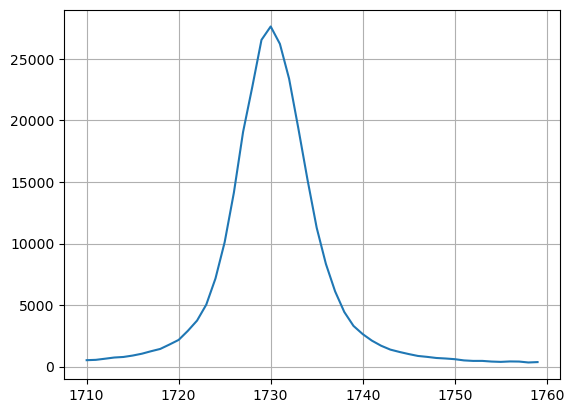

In [26]:
plt.plot(np.arange(x0,x1),spec_data[1700,x0:x1])
plt.grid()

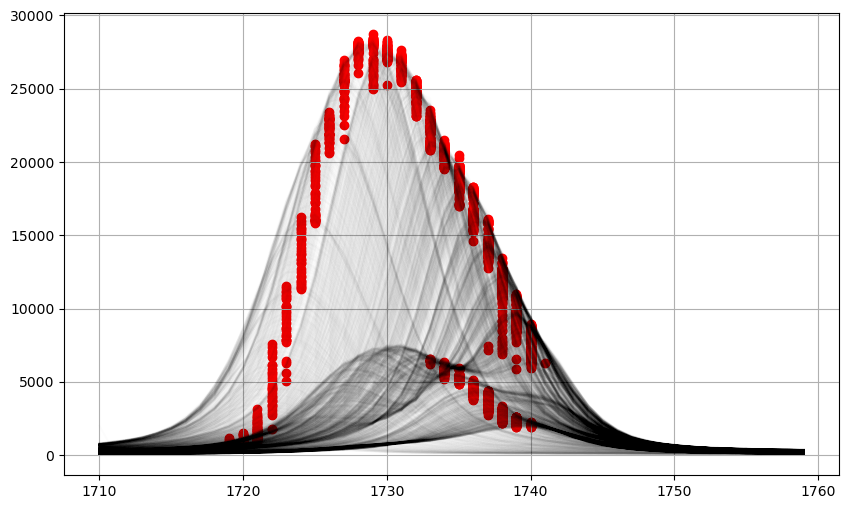

In [27]:
plt.figure(figsize=(10,6))
for i in range(y0,y1):
    x_ = np.arange(x0,x1)
    y_ = spec_data[i,x0:x1]
    plt.plot(x_,y_,ls='-',color='k',alpha=0.01)
    max_y = np.max(spec_data[i,x0:x1])
    max_x = x_[np.where(y_==max_y)[0]]
    plt.scatter(max_x,max_y,marker='o',color='r')
plt.grid()

In [28]:
peak_spec = []
peak_spec_flat = []
peak_spec_sflat = []
peak_spec_sflat_grad = []
for i in range(y0,y1):
    max_ind_ = np.where(spec_data[i,x0:x1]==np.max(spec_data[i,x0:x1]))[0][0]
    
    peak_spec.append(spec_data[i,x0:x1][max_ind_])
    peak_spec_flat.append(spec_data_flat[i,x0:x1][max_ind_])
    peak_spec_sflat.append(spec_data_sflat[i,x0:x1][max_ind_])
    peak_spec_sflat_grad.append(spec_data_sflat_grad[i,x0:x1][max_ind_])
    
peak_spec = np.array(peak_spec)
peak_spec_flat = np.array(peak_spec_flat)
peak_spec_sflat = np.array(peak_spec_sflat)
peak_spec_sflat_grad = np.array(peak_spec_sflat_grad)

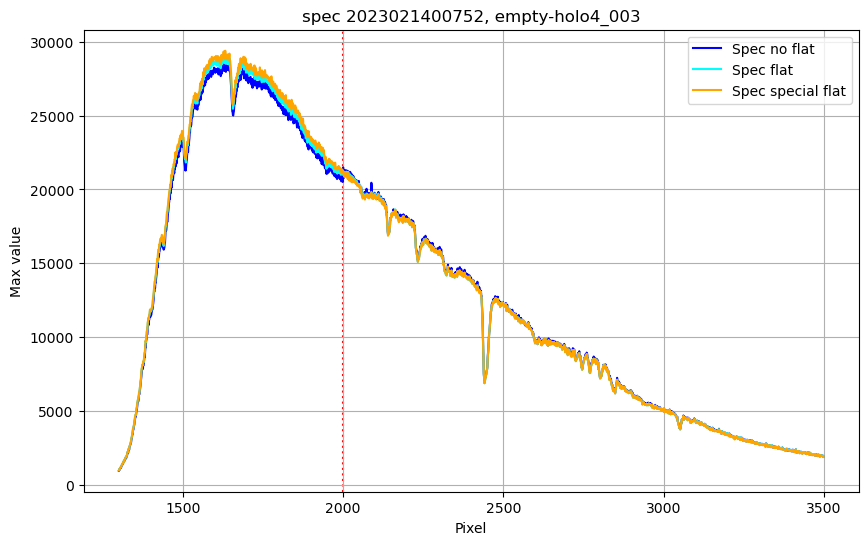

In [29]:
plt.figure(figsize=(10,6))
plt.plot(pix,peak_spec,ls='-',color='b',label='Spec no flat')
plt.plot(pix,peak_spec_flat,ls='-',color='cyan',label='Spec flat')
plt.plot(pix,peak_spec_sflat,ls='-',color='orange',label='Spec special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Max value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


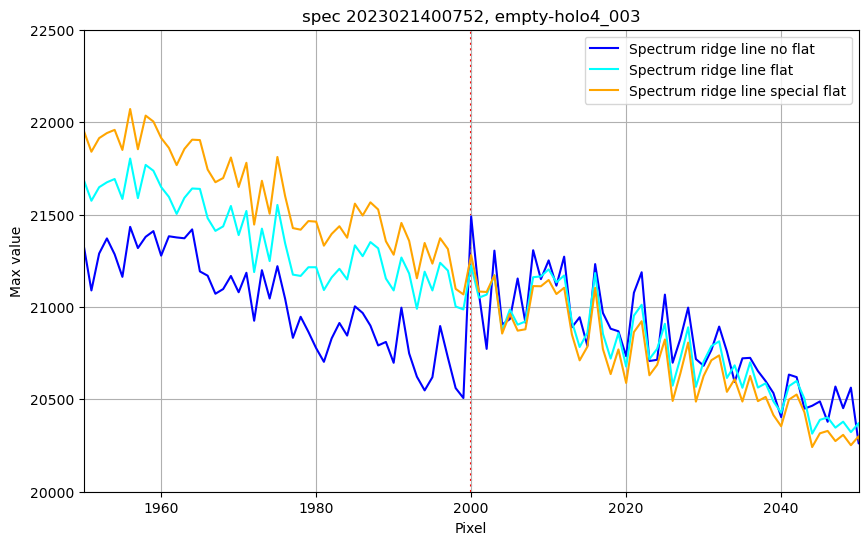

In [30]:
plt.figure(figsize=(10,6))
plt.plot(pix,peak_spec,ls='-',color='b',label='Spectrum ridge line no flat')
plt.plot(pix,peak_spec_flat,ls='-',color='cyan',label='Spectrum ridge line flat')
plt.plot(pix,peak_spec_sflat,ls='-',color='orange',label='Spectrum ridge line special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.xlim(1950,2050)
plt.ylim(20000,22500)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Max value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


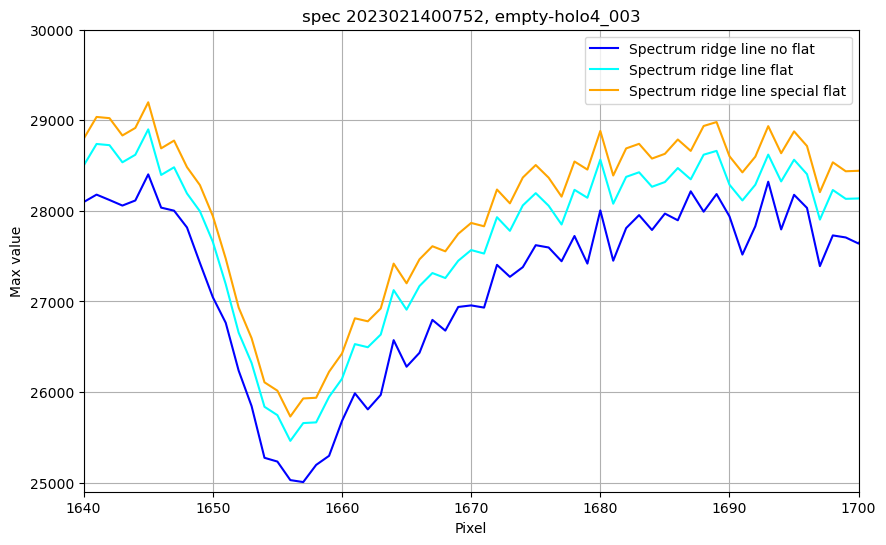

In [31]:
plt.figure(figsize=(10,6))
plt.plot(pix,peak_spec,ls='-',color='b',label='Spectrum ridge line no flat')
plt.plot(pix,peak_spec_flat,ls='-',color='cyan',label='Spectrum ridge line flat')
plt.plot(pix,peak_spec_sflat,ls='-',color='orange',label='Spectrum ridge line special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.xlim(1640,1700)
plt.ylim(24900,30000)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Max value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


In [32]:
print(x0,x1)

1710 1760


In [33]:
x_mid = 1735

mid_spec = []
mid_spec_flat = []
mid_spec_sflat = []
mid_spec_sflat_grad = []
for i in range(y0,y1):
    
    mid_spec.append(spec_data[i,x_mid])
    mid_spec_flat.append(spec_data_flat[i,x_mid])
    mid_spec_sflat.append(spec_data_sflat[i,x_mid])
    mid_spec_sflat_grad.append(spec_data_sflat_grad[i,x_mid])
    
mid_spec = np.array(mid_spec)
mid_spec_flat = np.array(mid_spec_flat)
mid_spec_sflat = np.array(mid_spec_sflat)
mid_spec_sflat_grad = np.array(mid_spec_sflat_grad)

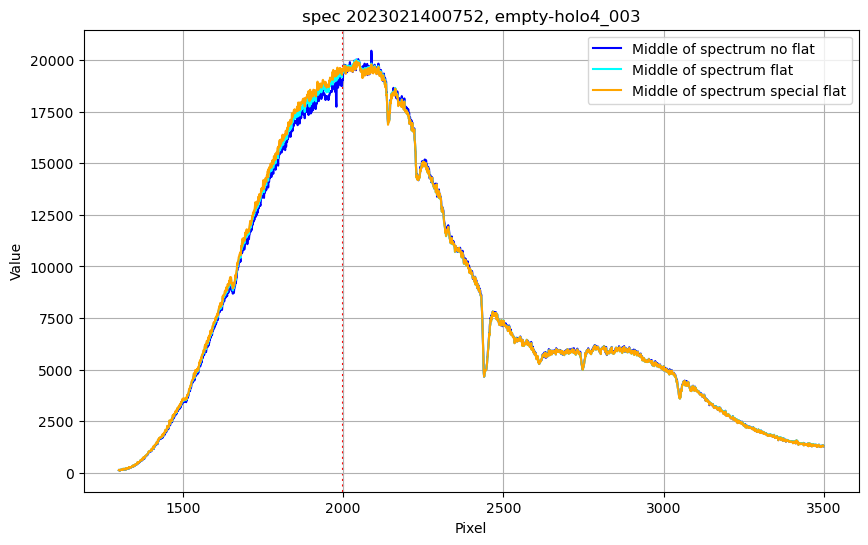

In [34]:
plt.figure(figsize=(10,6))
plt.plot(pix,mid_spec,ls='-',color='b',label='Middle of spectrum no flat')
plt.plot(pix,mid_spec_flat,ls='-',color='cyan',label='Middle of spectrum flat')
plt.plot(pix,mid_spec_sflat,ls='-',color='orange',label='Middle of spectrum special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


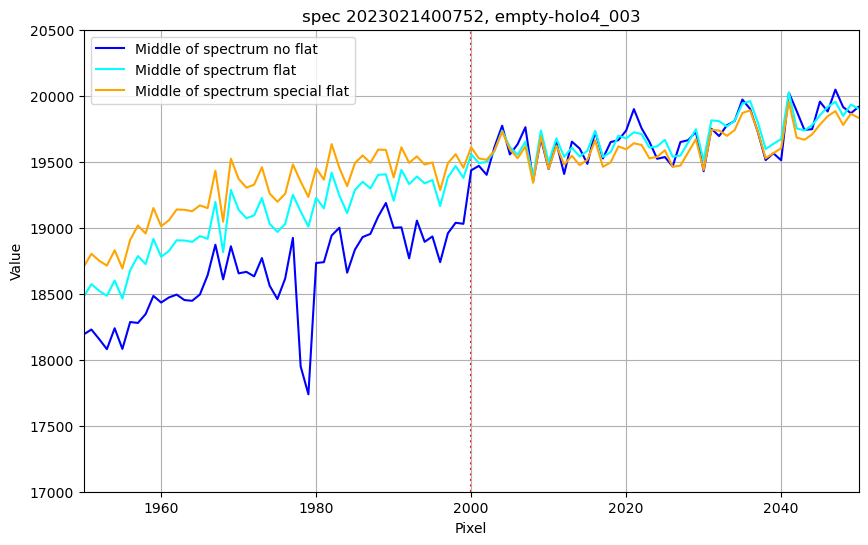

In [35]:
plt.figure(figsize=(10,6))
plt.plot(pix,mid_spec,ls='-',color='b',label='Middle of spectrum no flat')
plt.plot(pix,mid_spec_flat,ls='-',color='cyan',label='Middle of spectrum flat')
plt.plot(pix,mid_spec_sflat,ls='-',color='orange',label='Middle of spectrum special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.xlim(1950,2050)
plt.ylim(17000,20500)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


## Now we look at a column out of the spectrum 

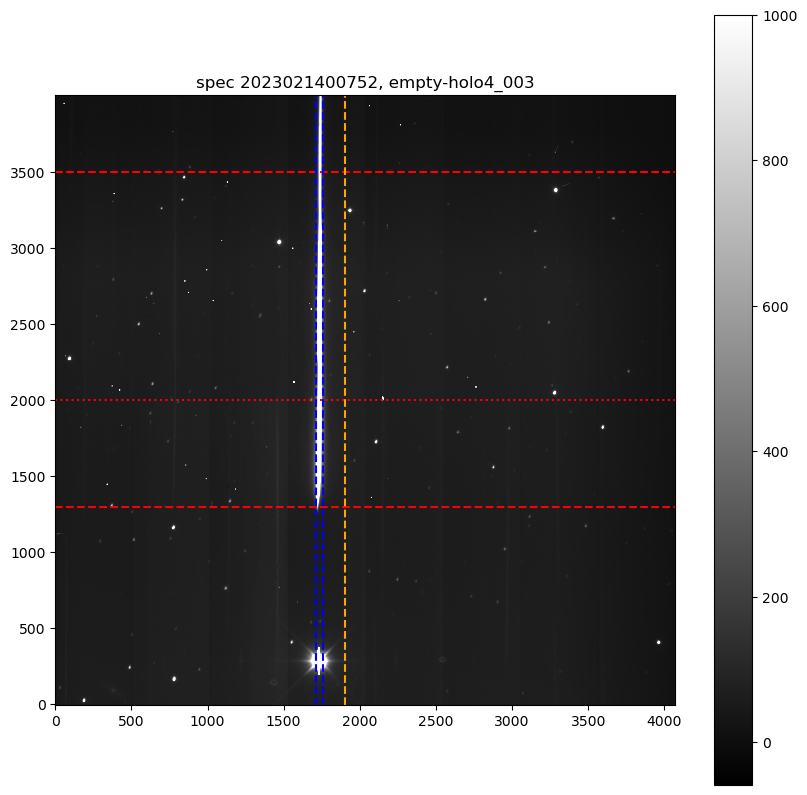

In [36]:
x0 = 1710
x1 = 1760
y0 = 1300
y1 = 3500

x_out = 1900

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
im = ax.imshow(spec_data,cmap="gray",vmax=1000,origin='lower')#,norm=LogNorm())
ax.axhline(y=y0,ls='--',color='r')
ax.axhline(y=y1,ls='--',color='r')
ax.axhline(y=2000,ls=':',color='r')
ax.axvline(x=x0,ls='--',color='b')
ax.axvline(x=x1,ls='--',color='b')
ax.axvline(x=x_out,ls='--',color='orange')
ax.set_title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
fig.colorbar(im,ax=ax)

In [37]:
out_spec = []
out_spec_flat = []
out_spec_sflat = []
out_spec_sflat_grad = []
for i in range(y0,y1):
    
    out_spec.append(spec_data[i,x_out])
    out_spec_flat.append(spec_data_flat[i,x_out])
    out_spec_sflat.append(spec_data_sflat[i,x_out])
    out_spec_sflat_grad.append(spec_data_sflat_grad[i,x_out])
    
out_spec = np.array(out_spec)
out_spec_flat = np.array(out_spec_flat)
out_spec_sflat = np.array(out_spec_sflat)
out_spec_sflat_grad = np.array(out_spec_sflat_grad)

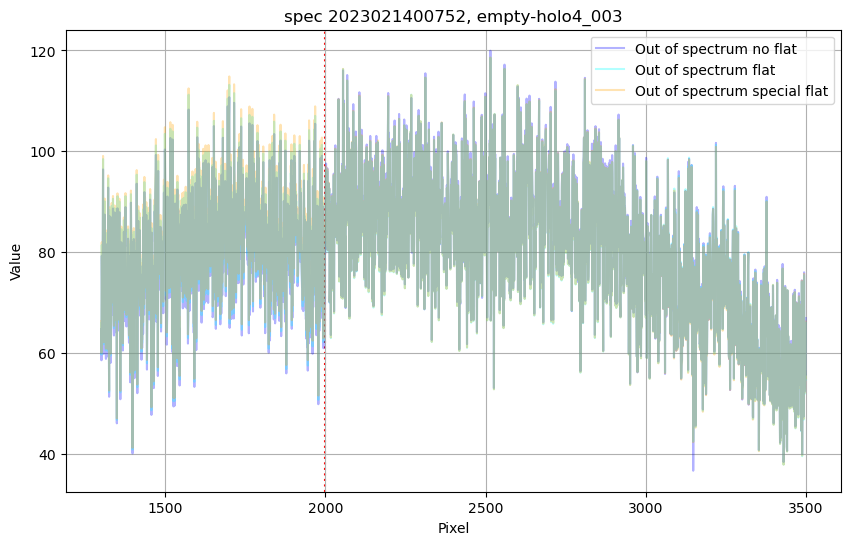

In [38]:
plt.figure(figsize=(10,6))
plt.plot(pix,out_spec,ls='-',color='b',alpha=0.3,label='Out of spectrum no flat')
plt.plot(pix,out_spec_flat,ls='-',color='cyan',alpha=0.3,label='Out of spectrum flat')
plt.plot(pix,out_spec_sflat,ls='-',color='orange',alpha=0.3,label='Out of spectrum special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")


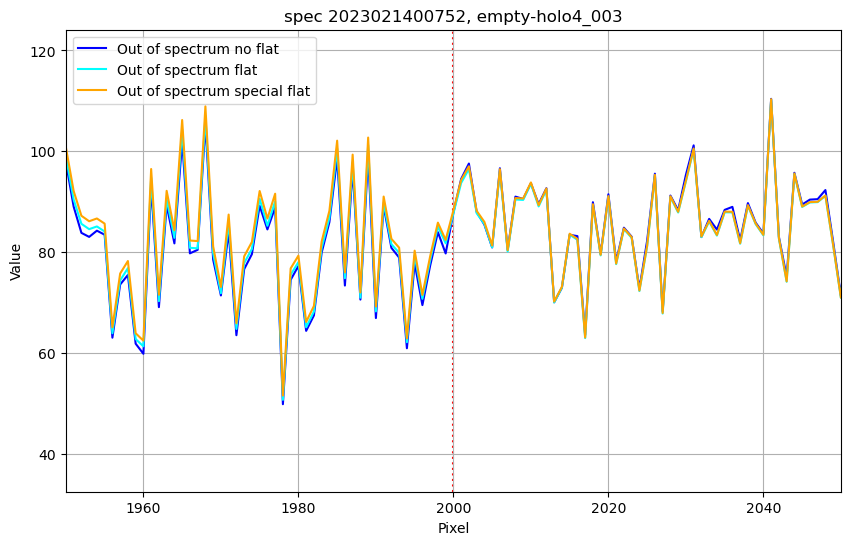

In [39]:
plt.figure(figsize=(10,6))
plt.plot(pix,out_spec,ls='-',color='b',label='Out of spectrum no flat')
plt.plot(pix,out_spec_flat,ls='-',color='cyan',label='Out of spectrum flat')
plt.plot(pix,out_spec_sflat,ls='-',color='orange',label='Out of spectrum special flat')
#plt.plot(pix,peak_spec_sflat_grad,ls='-',color='purple',label='Spec special flat grad. removed')
plt.axvline(x=2000,ls=':',color='r',zorder=-1)
plt.xlim(1950,2050)
plt.grid()
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('spec {0}00{1}, {2}'.format(date,spec_seq,spec_filter))
plt.legend(loc="best")